# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [6]:
df_data.sort_values(by='year').head(6)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU


In [7]:
df_data.sort_values(by='year').tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [8]:
print(f"Any duplicates? {df_data.duplicated().any()}")


Any duplicates? False


### Check for NaN Values

In [9]:
print(f'Any nan? Counts per column: \n{df_data.isna().sum()}')
print(f'Sample Rows: ')
df_data[df_data.isna().any(axis=1)].sample(10)

Any nan? Counts per column: 
year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64
Sample Rows: 


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
564,1986,Literature,The Nobel Prize in Literature 1986,"""who in a wide cultural perspective and with p...",1/1,Individual,Wole Soyinka,1934-07-13,Abeokuta,Nigeria,Nigeria,Male,NaN,NaN,NaN,NGA
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
344,1963,Literature,The Nobel Prize in Literature 1963,"""for his eminent lyrical writing, inspired by ...",1/1,Individual,Giorgos Seferis,1900-03-13,Smyrna (Izmir),Ottoman Empire (Turkey),Turkey,Male,NaN,NaN,NaN,TUR
65,1911,Peace,The Nobel Peace Prize 1911,NaN,1/2,Individual,Alfred Hermann Fried,1864-11-11,Vienna,Austria,Austria,Male,NaN,NaN,NaN,AUT
919,2017,Peace,The Nobel Peace Prize 2017,“for its work to draw attention to the catastr...,1/1,Organization,International Campaign to Abolish Nuclear Weap...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,1951,Literature,The Nobel Prize in Literature 1951,"""for the artistic vigour and true independence...",1/1,Individual,Pär Fabian Lagerkvist,1891-05-23,Växjö,Sweden,Sweden,Male,NaN,NaN,NaN,SWE
513,1980,Peace,The Nobel Peace Prize 1980,NaN,1/1,Individual,Adolfo Pérez Esquivel,1931-11-26,Buenos Aires,Argentina,Argentina,Male,NaN,NaN,NaN,ARG
238,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847,2011,Peace,The Nobel Peace Prize 2011,"""for their non-violent struggle for the safety...",1/3,Individual,Ellen Johnson Sirleaf,1938-10-29,Monrovia,Liberia,Liberia,Female,NaN,NaN,NaN,LBR
921,2017,Physics,The Nobel Prize in Physics 2017,“for decisive contributions to the LIGO detect...,1/4,Individual,Kip S. Thorne,1940-06-01,"Logan, UT",United States of America,United States of America,Male,LIGO/VIRGO Collaboration,NaN,NaN,USA


In [10]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [11]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Explanation of NaN values:

- Organization awardee types (such as the World Food Programme awarded the Peace Prize in 2020) do not have birth dates, cities, countries, etc., and do not need additional organization information.
- Some individual awardees do not have an organization affiliation (and assorted columns)
- For some early awards there is no motivation listed (such as the 1965 Peace award to UNICEF, or the 1931 Peace award to Jane Addams)

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [12]:
df_data.birth_date = pd.to_datetime(df_data.birth_date, errors='coerce')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

In [13]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denomenator

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [15]:
df_data.sample(10)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
232,1947,Chemistry,The Nobel Prize in Chemistry 1947,"""for his investigations on plant products of b...",1/1,Individual,Sir Robert Robinson,1886-09-13,"Rufford, near Chesterfield",United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,1.00
205,1939,Medicine,The Nobel Prize in Physiology or Medicine 1939,"""for the discovery of the antibacterial effect...",1/1,Individual,Gerhard Domagk,1895-10-30,Lagow,Germany (Poland),Poland,Male,Munster University,Munster,Germany,POL,1.00
434,1973,Peace,The Nobel Peace Prize 1973,NaN,1/2,Individual,Henry A. Kissinger,1923-05-27,Fürth,Germany,Germany,Male,NaN,NaN,NaN,DEU,0.50
827,2009,Physics,The Nobel Prize in Physics 2009,"""for the invention of an imaging semiconductor...",1/4,Individual,George E. Smith,1930-05-10,"White Plains, NY",United States of America,United States of America,Male,Bell Laboratories,"Murray Hill, NJ",United States of America,USA,0.25
901,2016,Chemistry,The Nobel Prize in Chemistry 2016,"""for the design and synthesis of molecular mac...",1/3,Individual,Jean-Pierre Sauvage,1944-10-21,Paris,France,France,Male,University of Strasbourg,Strasbourg,France,FRA,0.33
108,1922,Literature,The Nobel Prize in Literature 1922,"""for the happy manner in which he has continue...",1/1,Individual,Jacinto Benavente,1866-08-12,Madrid,Spain,Spain,Male,NaN,NaN,NaN,ESP,1.00
815,2008,Physics,The Nobel Prize in Physics 2008,"""for the discovery of the mechanism of spontan...",1/2,Individual,Yoichiro Nambu,1921-01-18,Tokyo,Japan,Japan,Male,University of Chicago,"Chicago, IL",United States of America,JPN,0.50
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Germany,Male,Berlin University,Berlin,Germany,DEU,1.00
678,1997,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for a new method to determine the value of de...",1/2,Individual,Myron S. Scholes,1941-07-01,"Timmins, ON",Canada,Canada,Male,Long Term Capital Management,"Greenwich, CT",United States of America,CAN,0.50
58,1910,Literature,The Nobel Prize in Literature 1910,"""as a tribute to the consummate artistry, perm...",1/1,Individual,Paul Johann Ludwig Heyse,1830-03-15,Berlin,Prussia (Germany),Germany,Male,NaN,NaN,NaN,DEU,1.00


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [16]:
biology = df_data.sex.value_counts()
fig = px.pie(biology, values=biology.values, names=biology.index, title='Male vs Female Nobel Laureates', hole=.4)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [17]:
df_data.loc[df_data.sex == 'Female'].sort_values(by='year').head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [18]:
df_data.loc[df_data.duplicated(subset=['full_name'], keep=False)].dropna(subset=['sex'])

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR,0.25


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [19]:
category = df_data.category.value_counts()
fig = px.bar(category, title='Number of Prizes Awarded by Category', 
             labels={'index':'Category', 'value':'Number of Prizes'},
             color='value',
             color_continuous_scale='Aggrnyl')
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [20]:
df_data.category.nunique()

6

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [21]:
df_data.loc[df_data.category == 'Economics'].sort_values(by='year').head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [22]:
# Can't do the below. Plotly.express does not support Multi Index
# sex_category = df_data.value_counts(['category', 'sex'])
sex_category = df_data.groupby(by=['category', 'sex'], as_index=False).agg({'prize':pd.Series.count})
sex_category = sex_category.sort_values(by='prize', ascending=False)
sex_category

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [23]:
fig = px.bar(data_frame=sex_category, x='category', y="prize", color='sex',
             title='Number of Prizes Awarded per Category Split by Men and Women')
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Number of Prizes')
fig.show()

Only 4 women were awarded a Nobel prize in Physics. 16 women were awarded a Nobel prize in Literature.

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [24]:
prize_per_year = df_data.groupby(by='year').count().prize 
moving_average = prize_per_year.rolling(window=5).mean()
# print(df_prize_rolling)


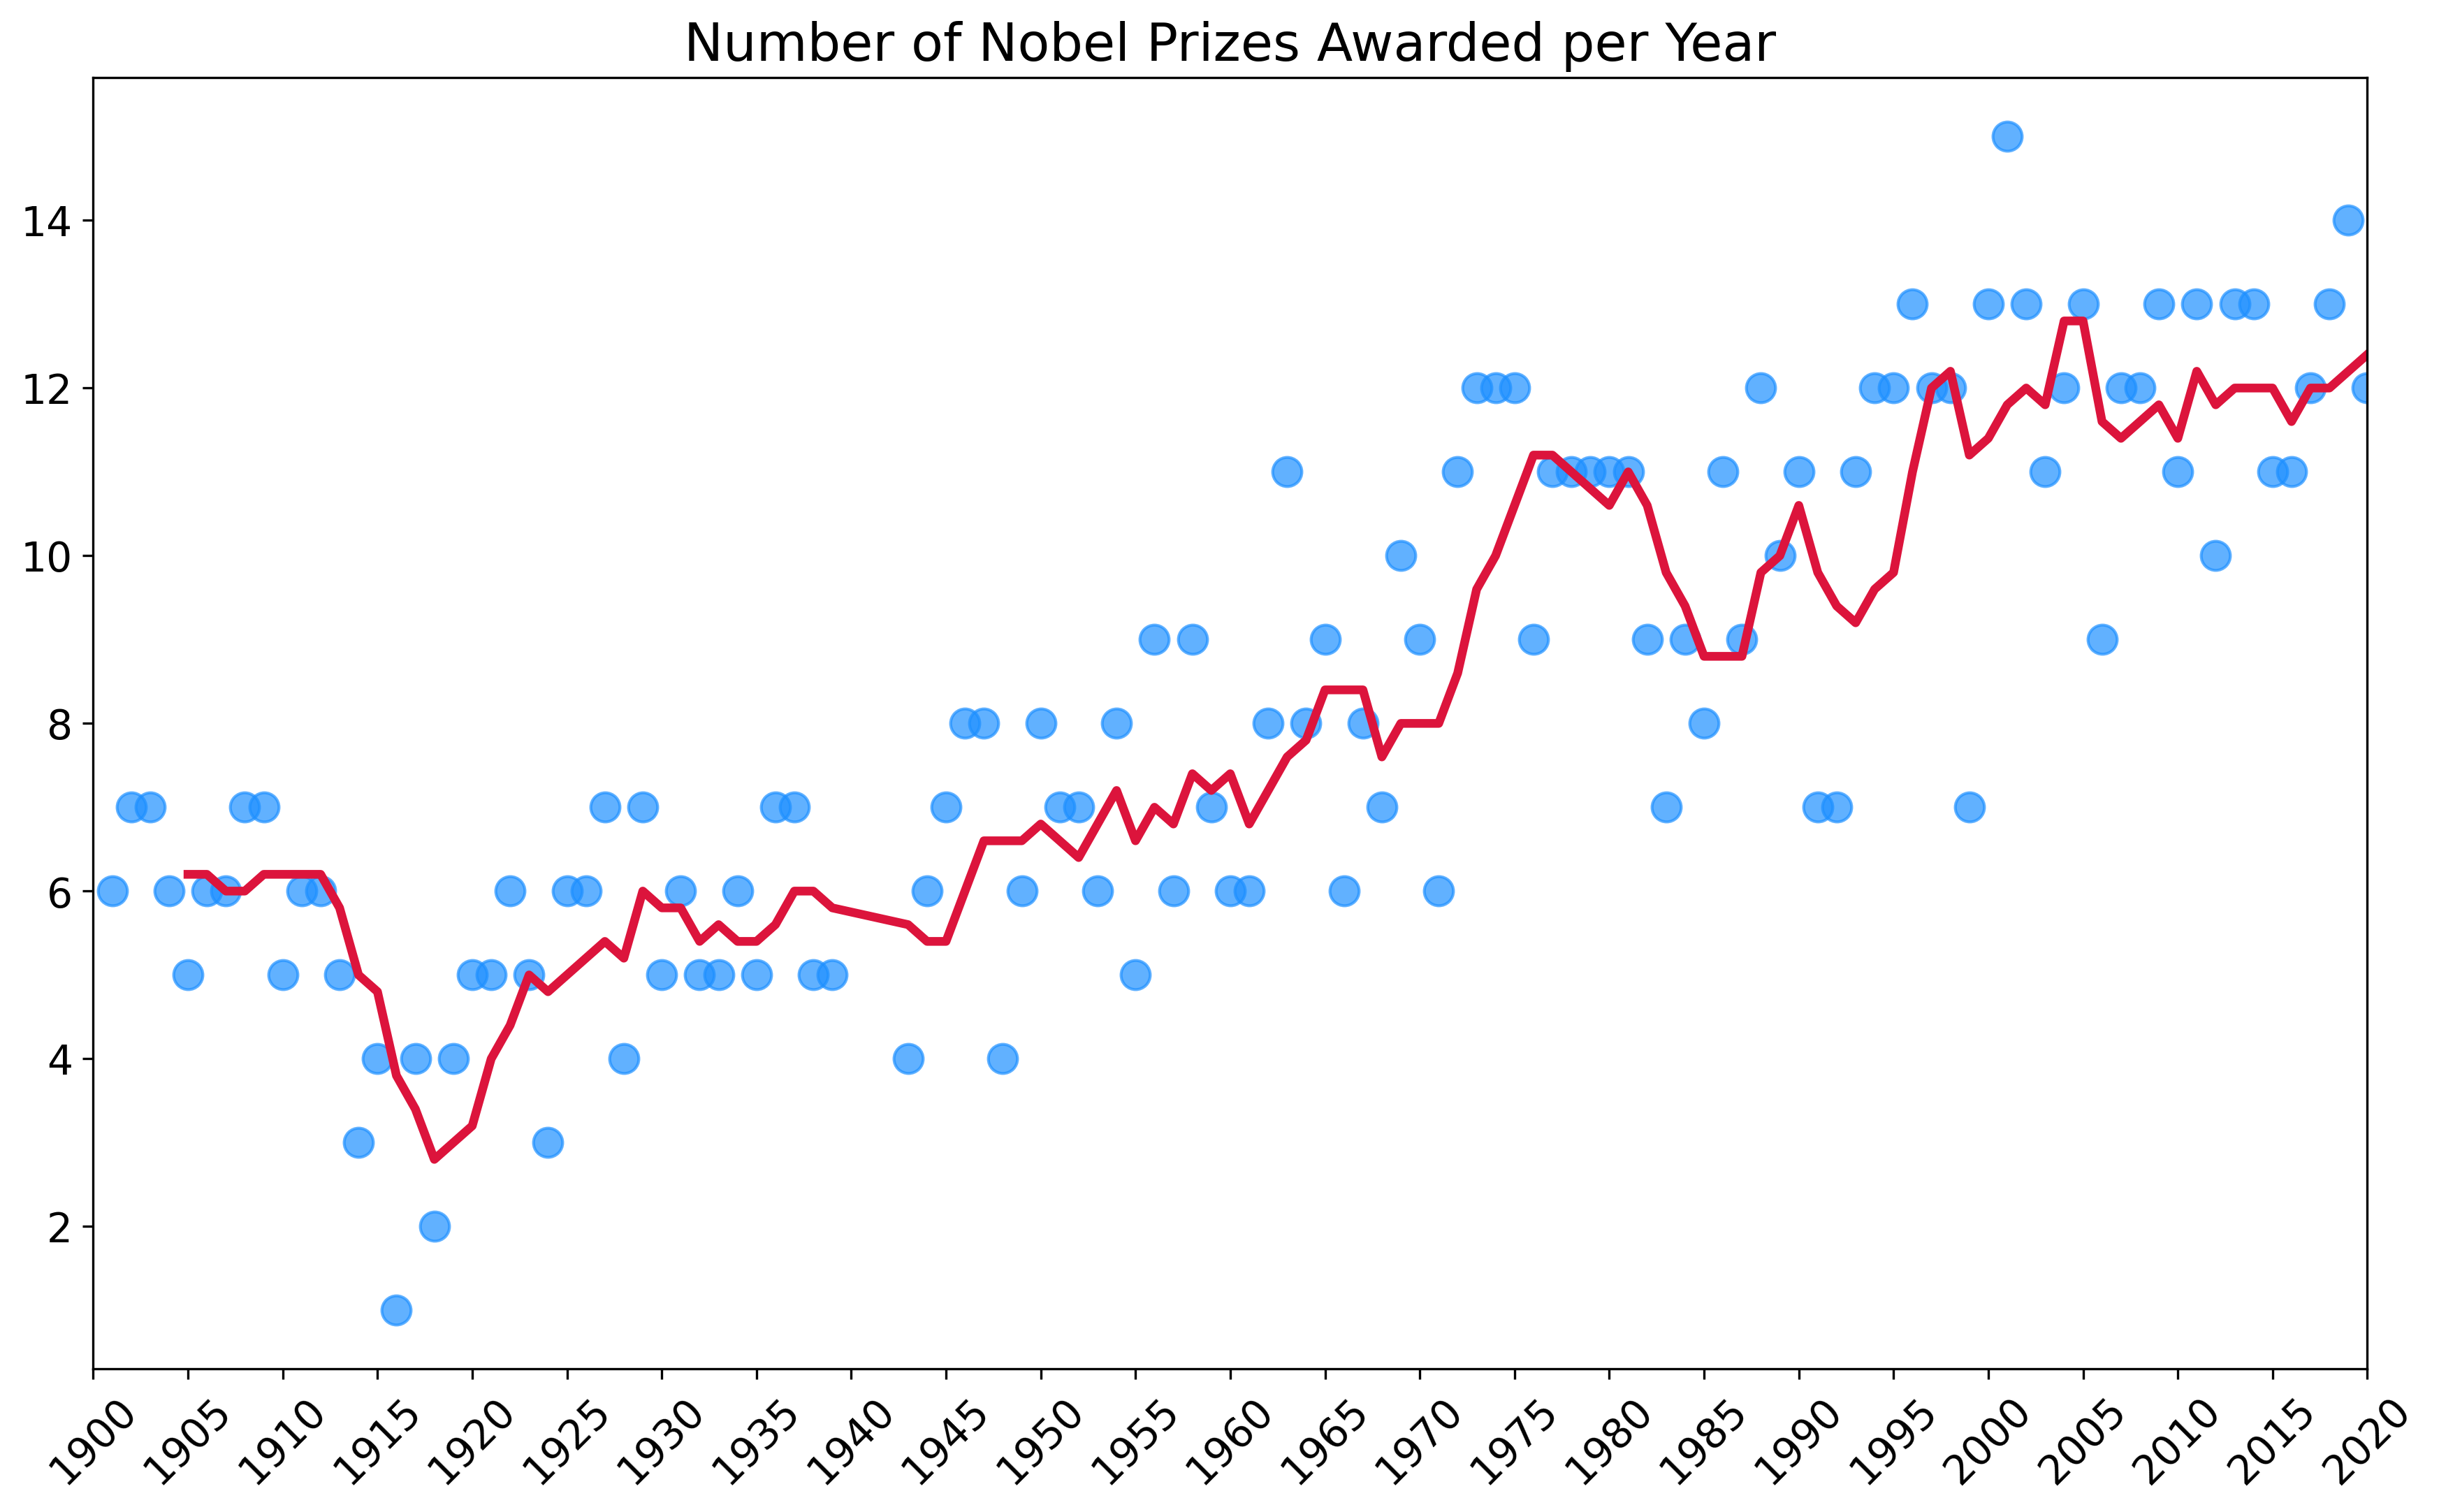

In [25]:
plt.figure(figsize=(14,8), dpi=300)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14, rotation=45)
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)

ax.scatter(x=prize_per_year.index, y=prize_per_year.values,
            c='dodgerblue', alpha=0.7, s=100)
ax.plot(prize_per_year.index, moving_average.values, c='crimson',
         linewidth = 3)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [26]:
win_share = df_data.groupby('year').mean().share_pct
rolling_share = win_share.rolling(window=5).mean()

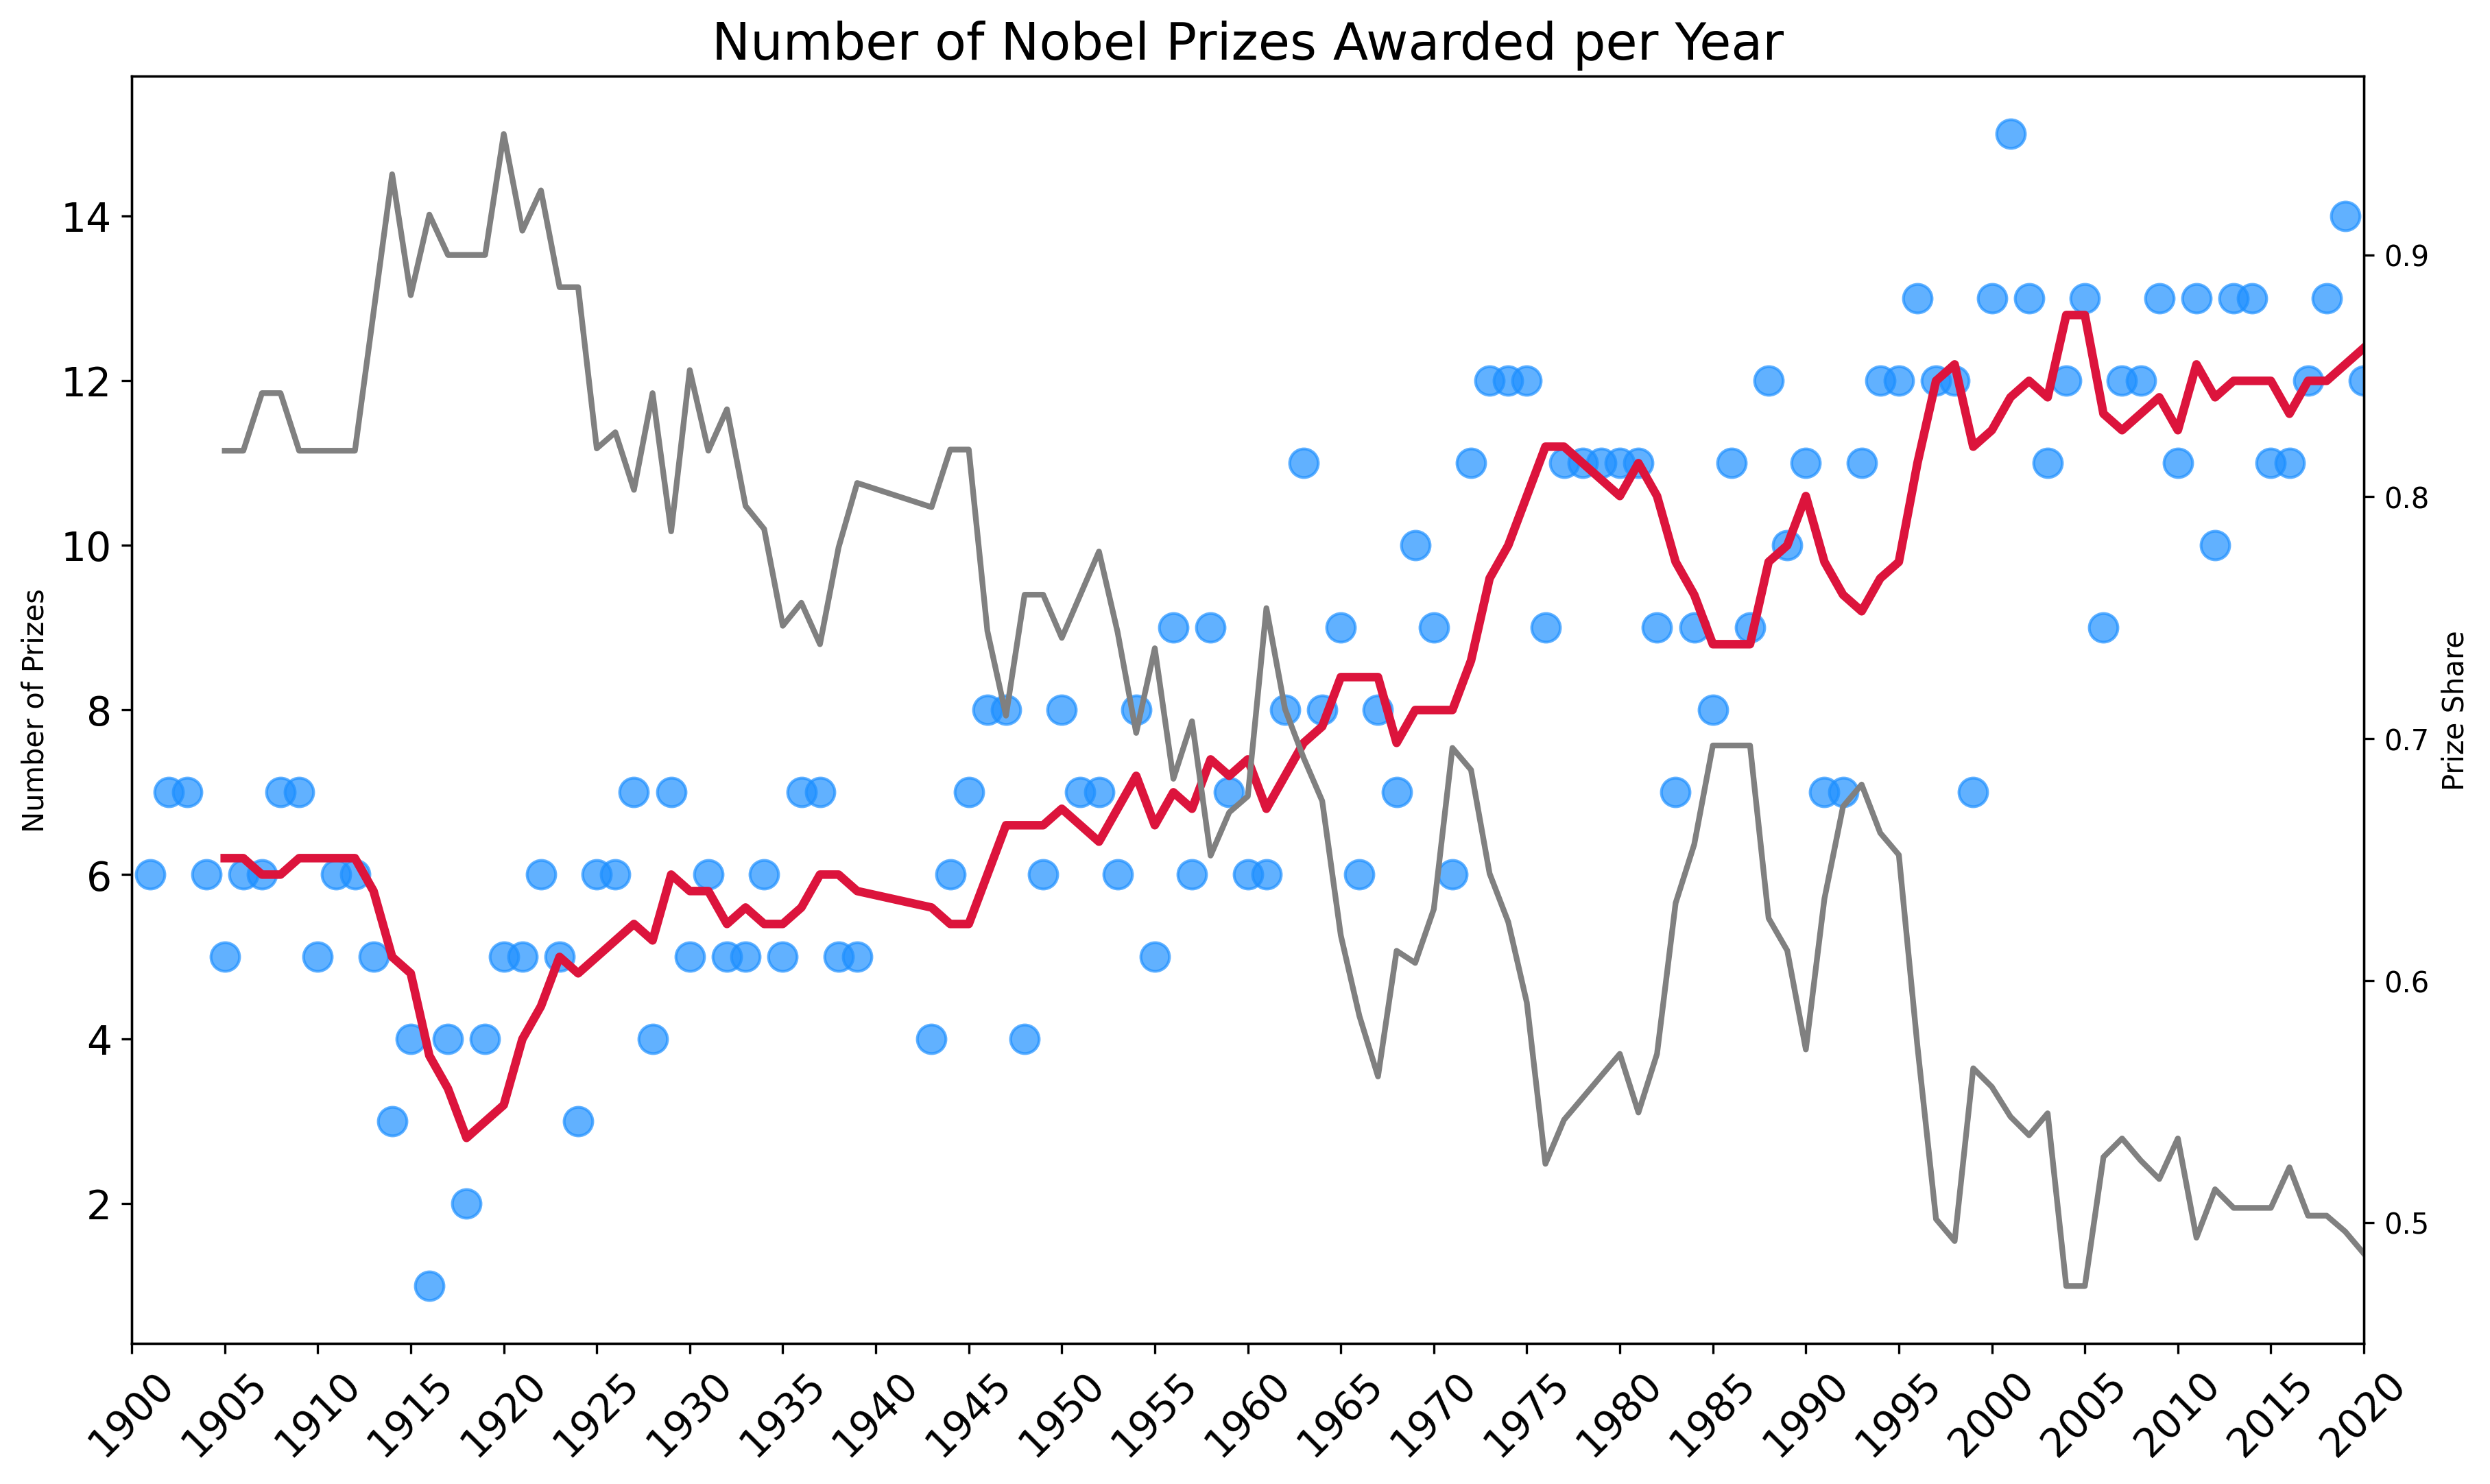

In [27]:
plt.figure(figsize=(14,8), dpi=300)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14, rotation=45)
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_xlim(1900, 2020)
ax1.set_ylabel('Number of Prizes')

ax1.scatter(x=prize_per_year.index, y=prize_per_year.values,
            c='dodgerblue', alpha=0.7, s=100)
ax1.plot(prize_per_year.index, moving_average.values, c='crimson',
         linewidth = 3)

ax2.set_ylabel('Prize Share')

ax2.plot(win_share.index, rolling_share.values, c='gray',
         linewidth=2)

plt.show()

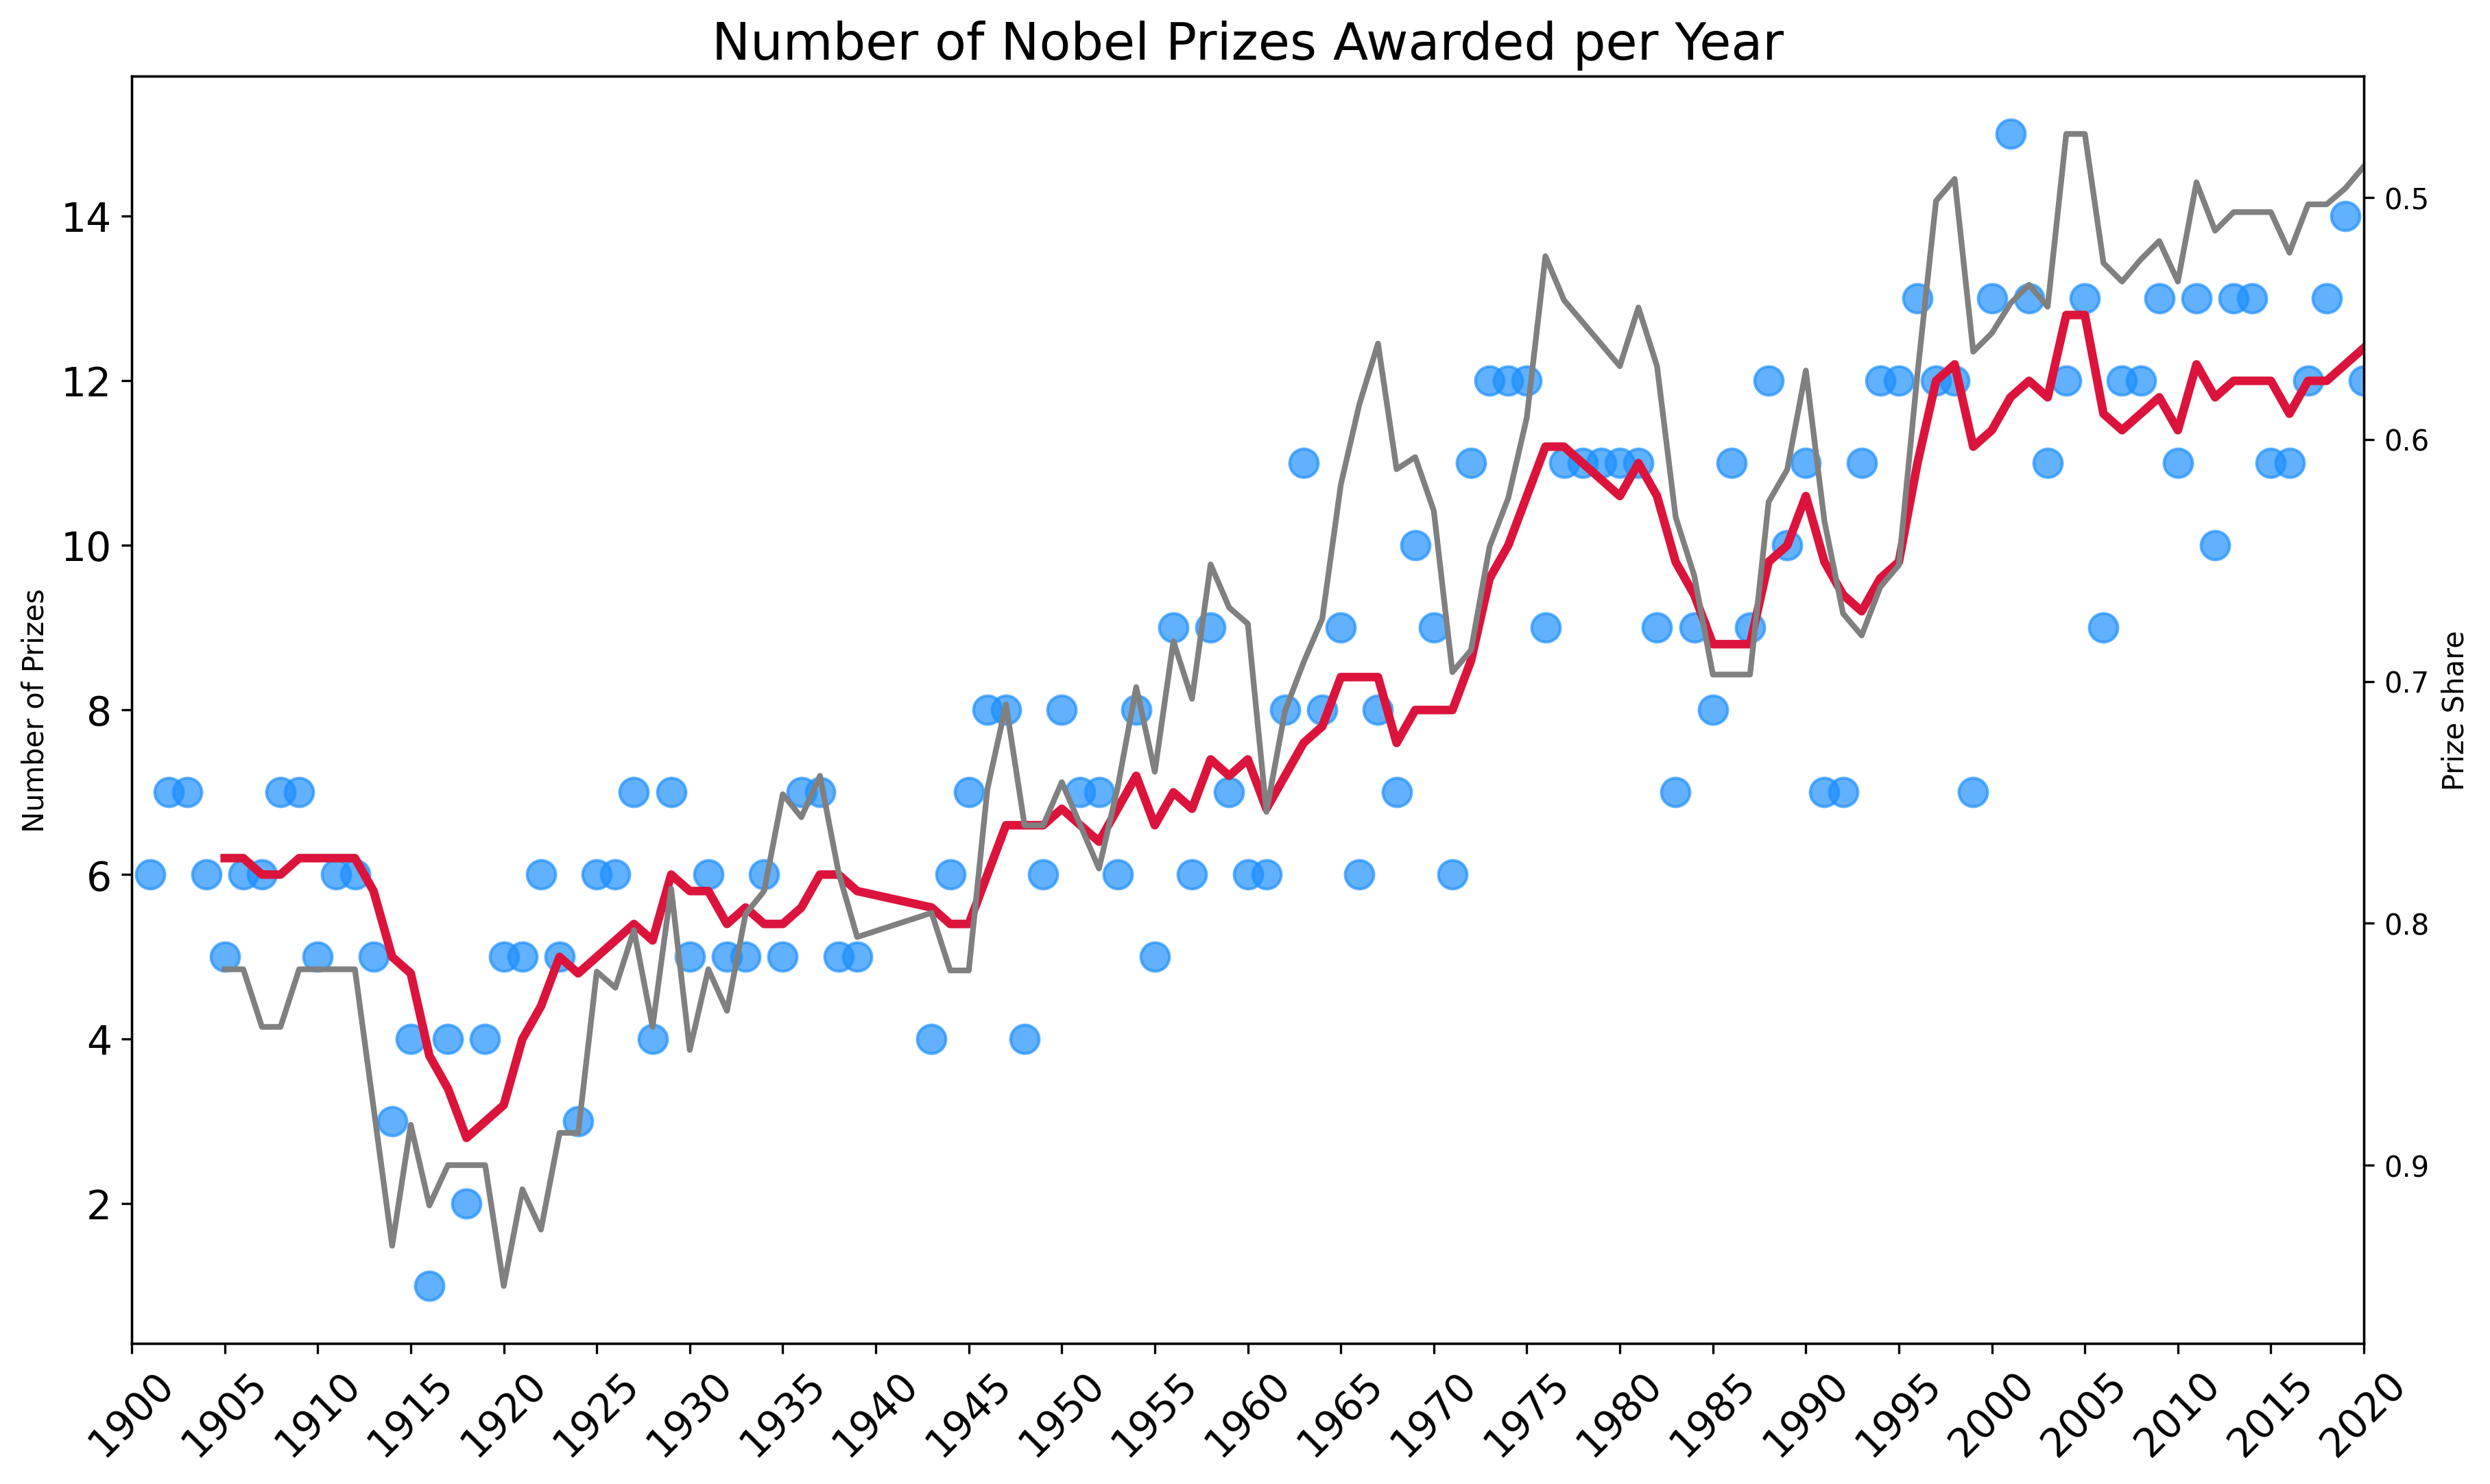

In [28]:
plt.figure(figsize=(14,8), dpi=300)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14, rotation=45)
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_xlim(1900, 2020)
ax1.set_ylabel('Number of Prizes')

ax1.scatter(x=prize_per_year.index, y=prize_per_year.values,
            c='dodgerblue', alpha=0.7, s=100)
ax1.plot(prize_per_year.index, moving_average.values, c='crimson',
         linewidth = 3)

ax2.set_ylabel('Prize Share')
ax2.invert_yaxis()
# ax2.set_ylim(1, 0)
ax2.plot(win_share.index, rolling_share.values, c='gray',
         linewidth=2)

plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [29]:
top_20_countries = df_data.groupby(by='birth_country_current', as_index=False).agg({'prize':pd.Series.count})
top_20_countries = top_20_countries.sort_values(by='prize', ascending=False)[:20]
print(top_20_countries.prize.sum())
top_20_countries

803


,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
40,Japan,27
57,Poland,27
61,Russia,26
11,Canada,20
68,Switzerland,19


In [30]:
top_20_countries = df_data.groupby(by='birth_country', as_index=False).agg({'prize':pd.Series.count})
top_20_countries = top_20_countries.sort_values(by='prize', ascending=False)[:20]
print(top_20_countries.prize.sum())
top_20_countries

732


,birth_country,prize
118,United States of America,281
117,United Kingdom,91
45,Germany,65
41,France,54
107,Sweden,29
62,Japan,27
25,Canada,20
108,Switzerland,19
73,Netherlands,18
61,Italy,17


If using *"birth_country"* rather than *"birth_country_current"*, Poland comes off the list, and Russia's numbers go down. I think *"birth_country_current"* is a better selector.

In [31]:
top_20_countries_org = df_data.groupby(by='organization_country', as_index=False).agg({'prize':pd.Series.count})
top_20_countries_org = top_20_countries_org.sort_values(by='prize', ascending=False)[:20]
top_20_countries_org

,organization_country,prize
26,United States of America,368
25,United Kingdom,93
10,Germany,67
9,France,38
23,Switzerland,24
16,Japan,18
22,Sweden,17
20,Russia,12
17,Netherlands,11
4,Canada,9


*"birth_country_current"* has the greatest number of total prizes reported, and includes unaffiliated individuals, which is especially important for prizes in literature and peace. However, the *"organization_country"* probably more accurately represents where the work was done - i.e. Marie Curie came from Poland, but did her work in France.

In [32]:
# plt.figure(figsize=(14,12), dpi=300)
top_20_countries_org = df_data.groupby(by='organization_country', as_index=False).agg({'prize':pd.Series.count})
top_20_countries_org = top_20_countries_org.sort_values(by='prize')[-20:]
h_bar = px.bar(top_20_countries_org, y='organization_country', x='prize', 
              title='Top 20 Countries Awarded Nobel Prizes (by Organization)', 
              labels={'organization_country':'Country', 'prize':'Number of Prizes'},
              orientation='h',
              color='prize',
              color_continuous_scale='Viridis',
              height=800)

h_bar.update_layout(yaxis_dtick=1,
                    coloraxis_showscale=False)

h_bar.show()

In [33]:
top_20_countries = df_data.groupby(by='birth_country_current', as_index=False).agg({'prize':pd.Series.count})
top_20_countries = top_20_countries.sort_values(by='prize')[-20:]

h_bar = px.bar(top_20_countries, y='birth_country_current', x='prize',  
              title='Top 20 Countries Awarded Nobel Prizes (by Birth Country)', 
              labels={'birth_country_current':'Country', 'prize':'Number of Prizes'},
              orientation='h',
              color='prize',
              color_continuous_scale='Viridis',
              height=800)

h_bar.update_layout(yaxis_dtick=1,
                    coloraxis_showscale=False)

h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [34]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Germany,Male,NaN,NaN,NaN,DEU,1.00


In [35]:
df_country_prizes = df_data.groupby(by=['ISO', 'birth_country_current'], as_index=False, sort=False).agg({'prize': pd.Series.count})
df_country_prizes.head()

,ISO,birth_country_current,prize
0,NLD,Netherlands,18
1,FRA,France,57
2,POL,Poland,27
3,CHE,Switzerland,19
4,DEU,Germany,84


In [36]:
fig = px.choropleth(df_country_prizes, locations="ISO", color='prize',
                    hover_name='birth_country_current',
                    color_continuous_scale='sunsetdark')
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [37]:
cat_country = df_data.groupby(by=['birth_country_current', 'category'], as_index=False).agg({'prize':pd.Series.count})
cat_country = cat_country.sort_values(by='prize', ascending=False)
# print(top_20_countries_cat.prize.sum())
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [38]:
merged_df = pd.merge(cat_country, top_20_countries, on='birth_country_current')
merged_df.columns = ['country', 'category', 'cat_prize', 'total_prize']
merged_df = merged_df.sort_values(by='total_prize')
merged_df

,country,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [39]:
cat_country_bar = px.bar(merged_df, y='country', x='cat_prize',  
                        title='Top 20 Countries Awarded Nobel Prizes (by Birth Country)', 
                        labels={'country':'Country', 'total_prize':'Total Prizes', 
                                'category':'Category', 'cat_prize': 'Prizes'},
                        orientation='h',
                        color='category',
                        hover_data=['cat_prize', 'total_prize'],
                        # color_continuous_scale='Viridis',
                        height=800)
cat_country_bar.update_layout(yaxis_dtick = 1)
cat_country_bar.show()

### Answering the above questions:

* In which category are Germany and Japan the weakest compared to the United States?
    - Economics. Germany has one, Japan has zero. The US has 49
* In which category does Germany have more prizes than the UK?
    - Physics. 26 vs UK's 24.
* In which categories does France have more prizes than Germany?
    - Peace, Literature, and Economics.
* Which category makes up most of Australia's nobel prizes?
    - Medicine. 7/10
* Which category makes up half of the prizes in the Netherlands?
    - Physics. 9/18
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?
    - Economics: No, 49 vs 57 total in France. Physics and Medicine: Yes, by a lot. US has 70 prizes in Physics and 78 in Medicine.

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [40]:
time_country = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).agg({'prize':pd.Series.count})
time_country.head()

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,1
2,Argentina,1936,1
3,Argentina,1947,1
4,Argentina,1980,1


In [41]:
time_country['cum_prizes'] = time_country.groupby(by='birth_country_current', as_index=False).prize.cumsum()
time_country.head(10)

,birth_country_current,year,prize,cum_prizes
0,Algeria,1957,1,1
1,Algeria,1997,1,2
2,Argentina,1936,1,1
3,Argentina,1947,1,2
4,Argentina,1980,1,3
5,Argentina,1984,1,4
6,Australia,1915,1,1
7,Australia,1945,1,2
8,Australia,1960,1,3
9,Australia,1963,1,4


In [42]:
time_country = pd.merge(time_country, top_20_countries.birth_country_current, on='birth_country_current')

In [43]:
time_country.tail()

,birth_country_current,year,prize,cum_prizes
495,United States of America,2016,1,259
496,United States of America,2017,6,265
497,United States of America,2018,6,271
498,United States of America,2019,3,274
499,United States of America,2020,7,281


In [44]:
fig = px.line(time_country, x='year', y='cum_prizes', color='birth_country_current',
              labels={'birth_country_current': 'Country',
                      'cum_prizes': 'Cumulative Prizes',
                      'prize': 'Prizes',
                      'year': 'Year'},
              title='Prizes by Country Over Time',
              hover_data=['prize'],
              height=600)
fig.update_yaxes(range=[-5, 300])
fig.update_xaxes(range=[1900, 2020],
                 tickangle=45, dtick=10)
fig.show()

### Prizes by Country Over Time
* When did the US eclipse every other country in terms of the # of prizes won?
    - 1950
* Which country or countries were leading previously?
    - Germany. After the US, the UK was distant 3rd and France 4th.
* Calculate the cumulative number of prizes won by each country in every year. Again, use the birth_country_current of the winner to calculate this.
    - This info is in the *time_country* dataframe above in a column. See cell # 104. Was winnowed down to top 20 countries in #105

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [45]:
df_orgs = df_data.groupby(by='organization_name', as_index=False).agg({'prize': pd.Series.count})
df_orgs = df_orgs.sort_values(by='prize')[-20:]
df_orgs

,organization_name,prize
79,Institut Pasteur,7
109,London University,7
67,Harvard Medical School,7
192,University College London,7
40,Cornell University,8
12,Bell Laboratories,8
258,Yale University,9
111,MRC Laboratory of Molecular Biology,10
222,University of Oxford,12
152,Rockefeller University,13


### Answers
* Which organisations make up the top 20?
    - See above dataframe from cell 47.
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?
    - Chicago: 20; Harvard: 29

In [46]:
h_bar = px.bar(df_orgs, y='organization_name', x='prize', 
              title='Top 20 Organizations With Nobel Laureats', 
              labels={'organization_name':'Organization', 'prize':'Number of Prizes Awarded'},
              orientation='h',
              color='prize',
              color_continuous_scale='Viridis',
            #   height=800,
              width = 875,
              )

h_bar.update_layout(yaxis_dtick=1,
                    font_size=7,
                    coloraxis_showscale=False)

h_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [47]:
df_cities = df_data.groupby(by='organization_city', as_index=False).agg({'prize': pd.Series.count})
df_cities = df_cities.sort_values(by='prize')[-20:]
df_cities

,organization_city,prize
65,Göttingen,8
186,Zurich,8
71,Heidelberg,9
119,"New Haven, CT",9
110,Munich,9
23,"Boston, MA",9
108,Moscow,10
157,Stockholm,10
126,Oxford,12
13,Berlin,12


In [48]:
h_bar = px.bar(df_cities, y='organization_city', x='prize', 
              title='Top 20 Research Organization Cities With Nobel Laureats', 
              labels={'organization_city':'City', 'prize':'Number of Prizes Awarded'},
              orientation='h',
              color='prize',
              color_continuous_scale='Viridis',
            #   height=800,
              width = 875,
              )

h_bar.update_layout(yaxis_dtick=1,
                    xaxis_dtick=5,
                    font_size=9,
                    coloraxis_showscale=False)

h_bar.show()

### Answers to Challenge 2 questions
- Each research organisation is located in a particular city. Are some cities hot spots for scientific discoveries? Where do major discoveries tend to take place?  
    - The answer to this is yes, some cities are hot spots. Those cities generally have large major universities.  
<br>

- Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.  
    - Done. See above.  
<br>

- Where is the number one hotspot for discoveries in the world?  
    - Cambridge, MA. They really should add in Boston, since the Cambridge distinction is pompous (MIT and Harvard are technically in Cambridge. Like saying University of Miami is in Coral Gables). Harvard University Hospital (Mass Gen) and Brigham and Women's Hospital are both in Boston and also associated with Harvard, so the distinction is really meaningless. The total is 59. If you want further breakdown, see the chart.  
<br>

- Which city in Europe has had the most discoveries?  
    - Cambridge, UK has the most discoveries in Europe at 31.  

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [49]:
# df_data.info()
df_birth_cities = df_data.groupby(by='birth_city', as_index=False).agg({'prize': pd.Series.count})
df_birth_cities = df_birth_cities.sort_values(by='prize')[-20:]
df_birth_cities

,birth_city,prize
343,"Milwaukee, WI",3
87,Cairo,4
356,Montreal,4
428,"Pittsburgh, PA",4
167,Frankfurt-on-the-Main,5
440,Prague,5
515,Stockholm,6
210,Hamburg,6
363,Munich,7
358,Moscow,7


In [50]:
h_bar = px.bar(df_birth_cities, y='birth_city', x='prize', 
              title='Top 20 Cities Where Nobel Laureats Were Born', 
              labels={'birth_city':'City of Birth', 'prize':'Number of Prizes Awarded'},
              orientation='h',
              color='prize',
              color_continuous_scale='Plasma',
            #   height=800,
              width = 875,
              )

h_bar.update_layout(yaxis_dtick=1,
                    xaxis_dtick=5,
                    font_size=9,
                    coloraxis_showscale=False)

h_bar.show()

### Answers to Challenge 3

* What percentage of the United States prizes came from Nobel laureates born in New York?
    - I am going to include Brooklyn in the New York counts. They have the same mayor. (53 + 8)/281 = 21.7%
    <br>
* How many Nobel laureates were born in London, Paris and Vienna?
    - London: 19; Paris: 26; Vienna: 14
    <br>
* Out of the top 5 cities, how many are in the United States?
    - Counting "New York" & Brooklyn as same city: 6



# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [51]:
df_orgs = df_data.groupby(by=['organization_name', 'organization_city', 'organization_country'], as_index=False).agg({'prize': pd.Series.count})
df_orgs.head()

,organization_name,organization_city,organization_country,prize
0,A.F. Ioffe Physico-Technical Institute,St. Petersburg,Russia,1
1,Aarhus University,Aarhus,Denmark,1
2,Academy of Sciences,Moscow,Russia,3
3,Amsterdam University,Amsterdam,Netherlands,2
4,Argonne National Laboratory,"Argonne, IL",United States of America,1


In [52]:
sunburst = px.sunburst(df_orgs, path=['organization_country', 'organization_city', 'organization_name'],
                       values='prize', color='organization_country',
                       labels={'prize':'Prizes', 'organization_country':'Country',
                               'organization_city':'City', 'organization_name':'Institute'})
sunburst.show()

### Answer
I don't know what I am supposed to notice about Germany and France. But France's awards are concentrated in Paris, whereas Germany has a much broader participation.

I **love** how clicking in the graph allows for exploration. Wow.

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [53]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [54]:
df_data['winning_age'] = df_data.year - df_data.birth_date.dt.year
df_data.sample(10)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
109,1922,Medicine,The Nobel Prize in Physiology or Medicine 1922,"""for his discovery relating to the production ...",1/2,Individual,Archibald Vivian Hill,1886-09-26,Bristol,United Kingdom,United Kingdom,Male,London University,London,United Kingdom,GBR,0.50,36.00
932,2018,Peace,The Nobel Peace Prize 2018,“for their efforts to end the use of sexual vi...,1/2,Individual,Nadia Murad,1993-07-02,Kojo,Iraq,Iraq,Female,NaN,NaN,NaN,IRQ,0.50,25.00
757,2003,Physics,The Nobel Prize in Physics 2003,"""for pioneering contributions to the theory of...",1/3,Individual,Vitaly L. Ginzburg,1916-10-04,Moscow,Russia,Russia,Male,P.N. Lebedev Physical Institute,Moscow,Russia,RUS,0.33,87.00
706,2000,Chemistry,The Nobel Prize in Chemistry 2000,"""for the discovery and development of conducti...",1/3,Individual,Alan G. MacDiarmid,1927-04-14,Masterton,New Zealand,New Zealand,Male,University of Pennsylvania,"Philadelphia, PA",United States of America,NZL,0.33,73.00
500,1979,Medicine,The Nobel Prize in Physiology or Medicine 1979,"""for the development of computer assisted tomo...",1/2,Individual,Godfrey N. Hounsfield,1919-08-28,Newark,United Kingdom,United Kingdom,Male,"Central Research Laboratories, EMI",London,United Kingdom,GBR,0.50,60.00
705,1999,Physics,The Nobel Prize in Physics 1999,"""for elucidating the quantum structure of elec...",1/2,Individual,Martinus J.G. Veltman,1931-06-27,Waalwijk,Netherlands,Netherlands,Male,NaN,Bilthoven,Netherlands,NLD,0.50,68.00
571,1987,Chemistry,The Nobel Prize in Chemistry 1987,"""for their development and use of molecules wi...",1/3,Individual,Charles J. Pedersen,1904-10-03,Pusan,Korea (South Korea),Korea (South Korea),Male,Du Pont,"Wilmington, DE",United States of America,KOR,0.33,83.00
629,1993,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having renewed research in economic histo...",1/2,Individual,Douglass C. North,1920-11-05,"Cambridge, MA",United States of America,United States of America,Male,Washington University,"St. Louis, MO",United States of America,USA,0.50,73.00
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,1.00,70.00
504,1979,Physics,The Nobel Prize in Physics 1979,"""for their contributions to the theory of the ...",1/3,Individual,Steven Weinberg,1933-05-03,"New York, NY",United States of America,United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA,0.33,46.00


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [55]:
from IPython.display import display_markdown
display_markdown('''### Answers''', raw=True)

oldest_laureate = df_data.iloc[df_data.winning_age.idxmax()]
youngest_laureate = df_data.iloc[df_data.winning_age.idxmin()]
print(f'- Oldest Nobel laureate: {oldest_laureate.full_name} who was {int(oldest_laureate.winning_age)} at the time of the award, '
      f'and won the {oldest_laureate.prize} for {oldest_laureate.motivation}.')

print(f'- Youngest Nobel laureate: {youngest_laureate.full_name} who was {int(youngest_laureate.winning_age)} '
      f'at the time of the award, and won the {youngest_laureate.prize} for {youngest_laureate.motivation}.')

print(f'- The average age of a Nobel prize winner is {df_data.winning_age.mean():,.2f} years old.')
print(f'- 75% of Nobel prize winners are younger than {df_data.winning_age.quantile(q=0.75)} years old at the time of their award.')

### Answers

- Oldest Nobel laureate: John Goodenough who was 97 at the time of the award, and won the The Nobel Prize in Chemistry 2019 for “for the development of lithium-ion batteries”.
- Youngest Nobel laureate: Malala Yousafzai who was 17 at the time of the award, and won the The Nobel Peace Prize 2014 for "for their struggle against the suppression of children and young people and for the right of all children to education".
- The average age of a Nobel prize winner is 59.95 years old.
- 75% of Nobel prize winners are younger than 69.0 years old at the time of their award.


<AxesSubplot:xlabel='winning_age', ylabel='Count'>

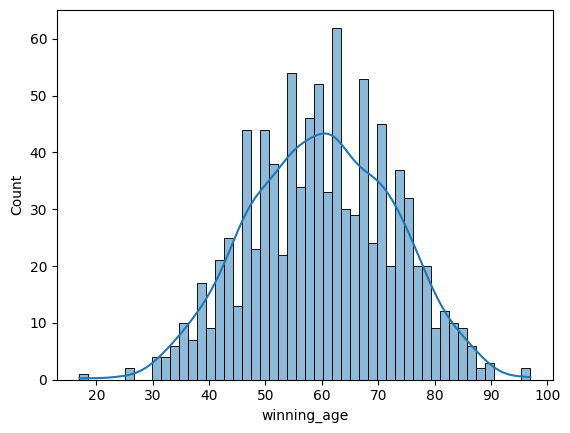

In [56]:
sns.histplot(data=df_data, x='winning_age', kde=True, bins=50)


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [57]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

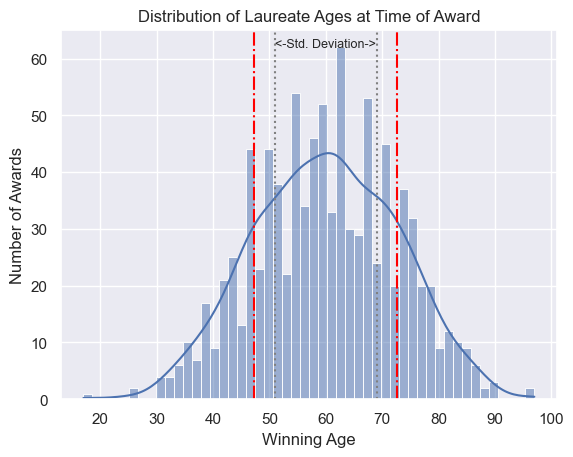

In [58]:
sns.set_theme()
sns.histplot(data=df_data, x='winning_age', kde=True, bins=50)
# going down to matplotlib to add lines
plt.title('Distribution of Laureate Ages at Time of Award')
plt.ylabel('Number of Awards')
plt.xlabel('Winning Age')
# draw lines at 25% and 75%
plt.axvline(df_data.winning_age.quantile(q=0.25), c='gray', linestyle='dotted')
plt.axvline(df_data.winning_age.quantile(q=0.75), c='gray', linestyle='dotted')
# draw standard deviation lines
plt.axvline(df_data.winning_age.mean() - df_data.winning_age.std(), c='red', linestyle='-.')
plt.axvline(df_data.winning_age.mean() + df_data.winning_age.std(), c='red', linestyle='-.')
# fig, ax = plt.subplots(figsize=(3,3))
plt.annotate('<-Std. Deviation->', xy=(.432,.952), xycoords='axes fraction', 
             fontsize=9)
# plt.suptitle('<-- Std. Deviation -->',)
plt.show()


### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


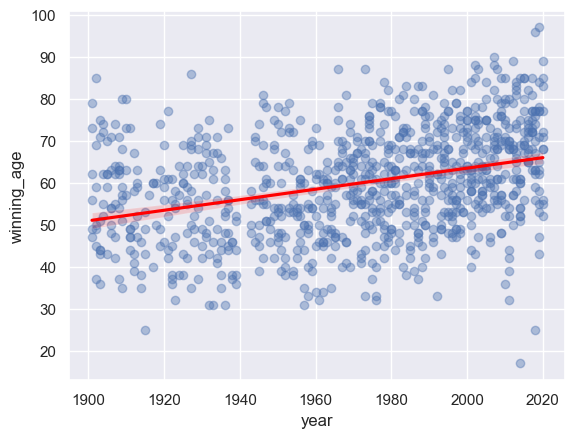

In [82]:
ax = sns.regplot(data=df_data, x='year', y='winning_age',  
                 scatter_kws = {'alpha': 0.4}, line_kws={"color": "red"})
plt.show()

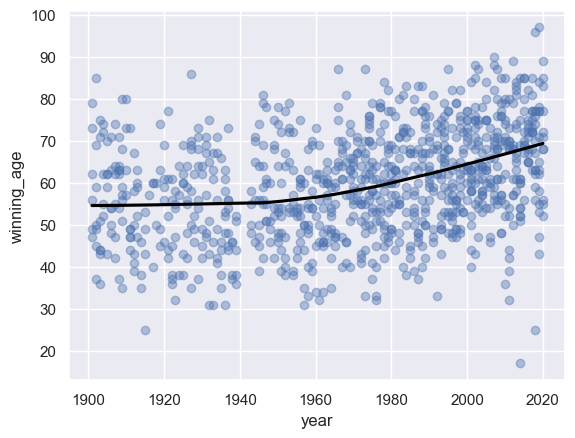

In [84]:
ax = sns.regplot(data=df_data, x='year', y='winning_age', lowess=True, 
                 scatter_kws = {'alpha': 0.4}, line_kws={"color": "black"})
plt.show()

### Answers
- According to the best fit line, Nobel laureates were 55 years old at the time of the award from 1900 - 1940
- According to the best fit line, Nobel laureates were 70 years old at the time of the award in 2020

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

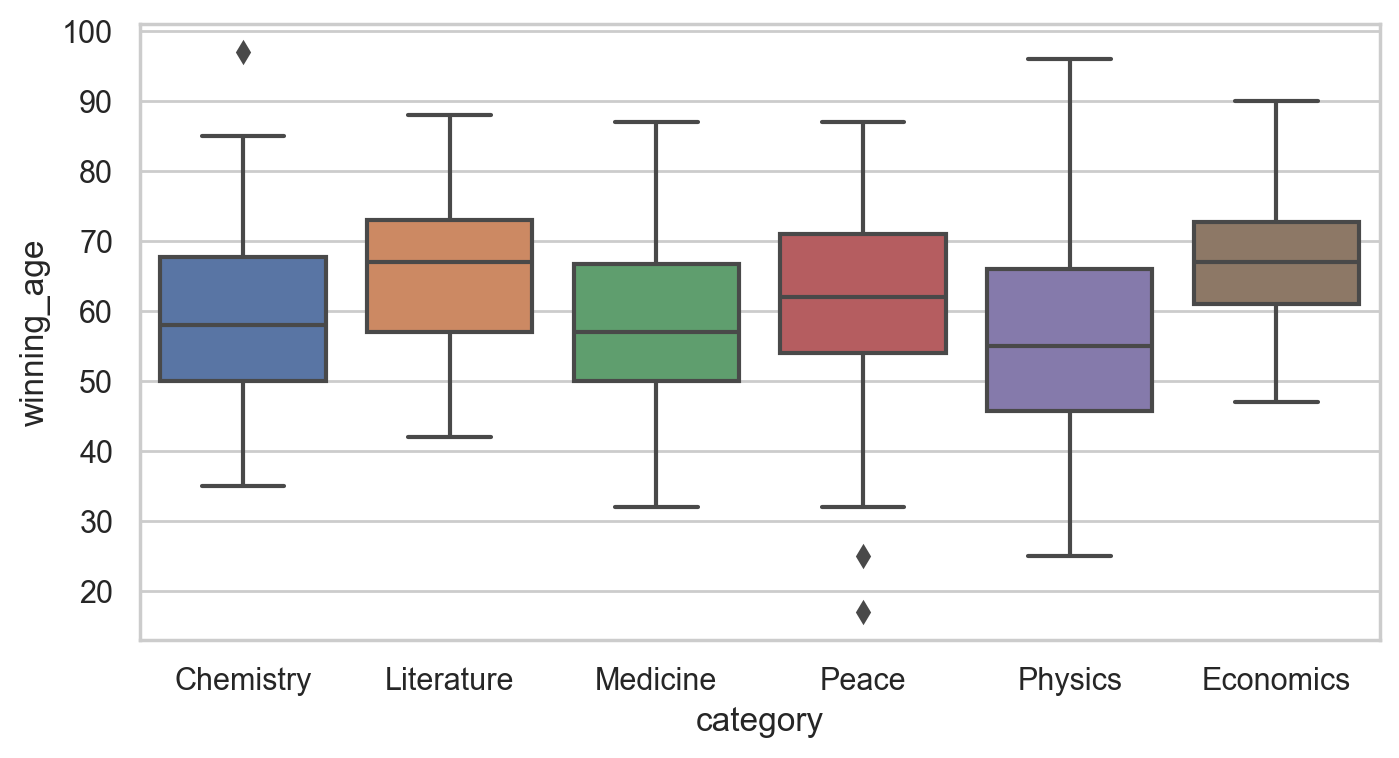

In [85]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
 
plt.show()

### Answers
- Which category has the longest "whiskers"?
    - Physics
- In which prize category are the average winners the oldest?
    - Looks like a tie between Literature and Economics
- In which prize category are the average winners the youngest?
    - Physics



In [76]:
age_box = px.box(data_frame=df_data, x='category', y='winning_age', color='category', 
                 color_discrete_sequence=px.colors.qualitative.Dark24)
age_box.update_layout(showlegend=False)

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


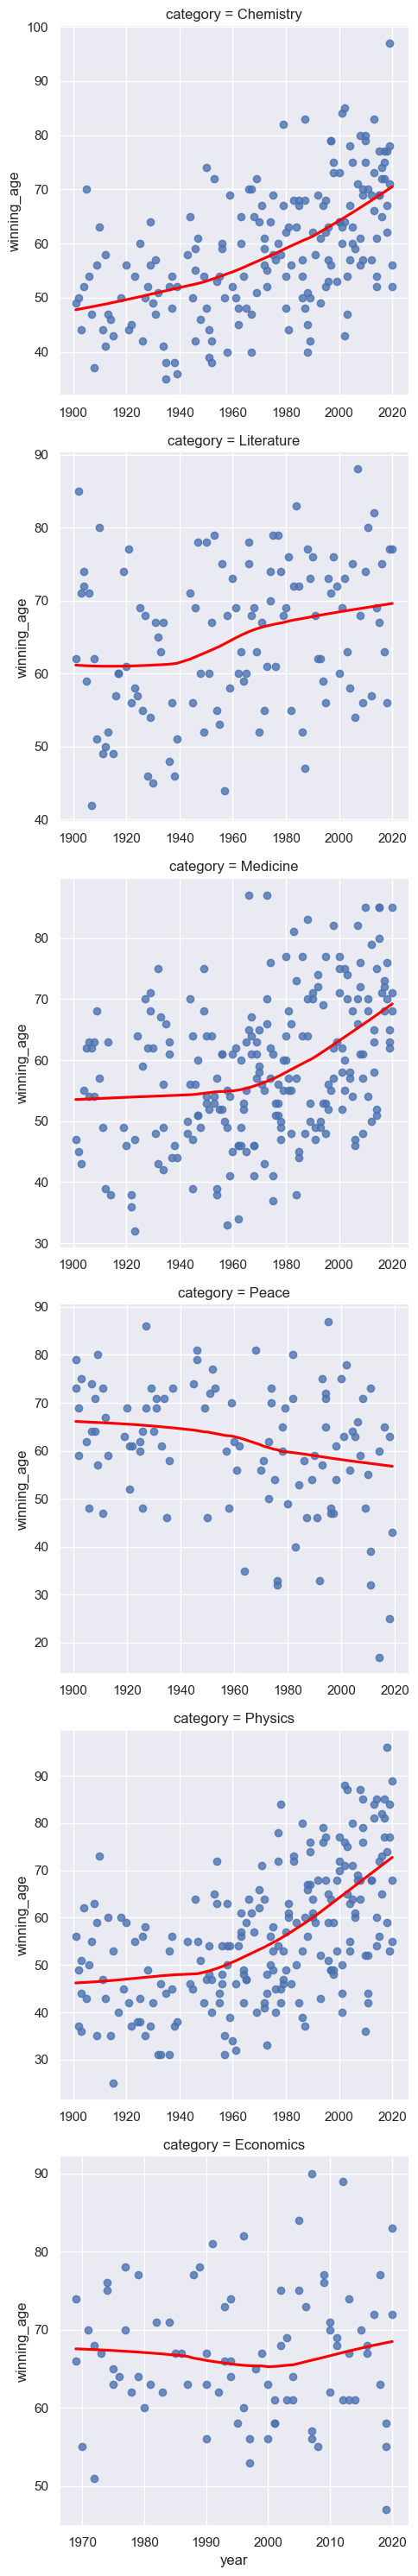

In [89]:
sns.lmplot(data=df_data, x='year', y='winning_age', lowess=True, 
           row='category', line_kws={"color": "red"},
           facet_kws=dict(sharex=False, sharey=False),)
plt.show()

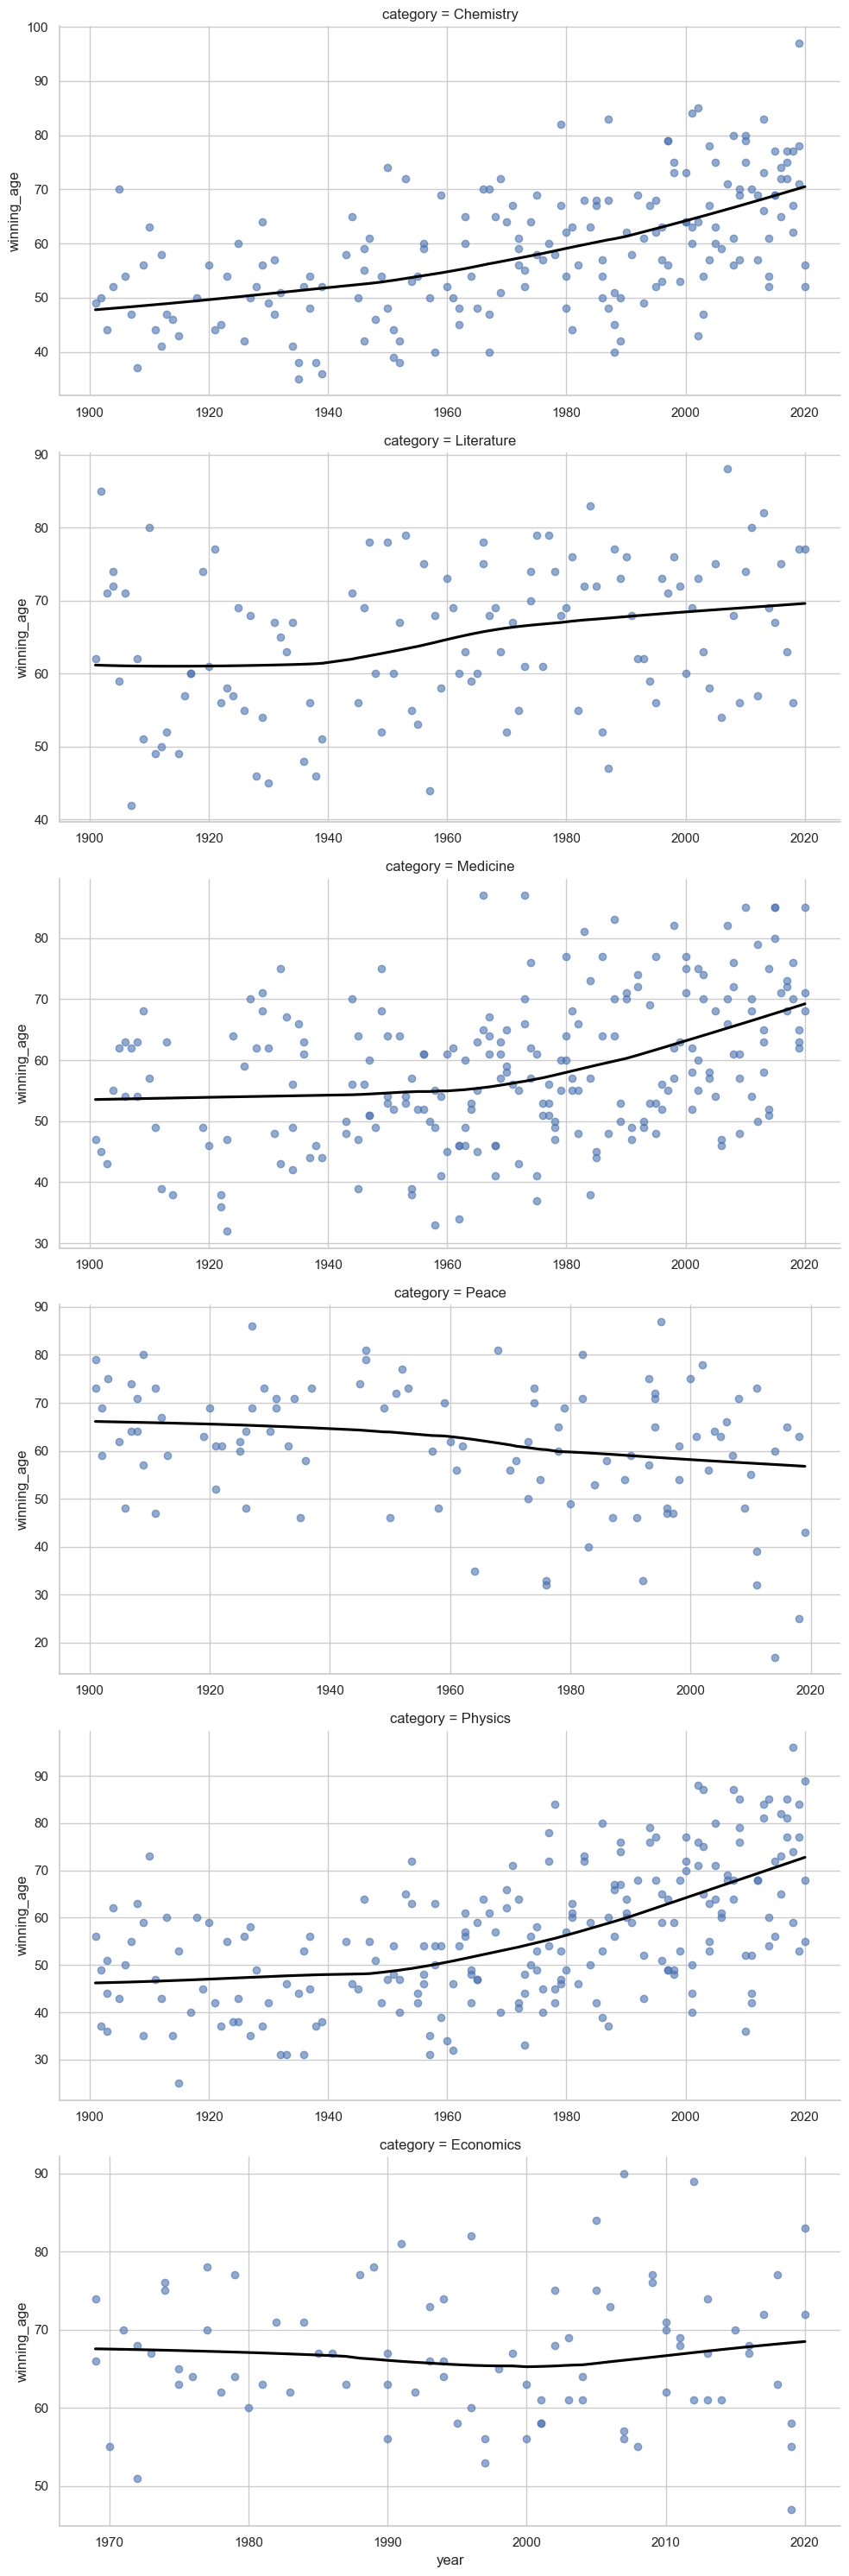

In [92]:
# Class solution - looks better
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},
               facet_kws=dict(sharex=False, sharey=False),)
 
plt.show()

### Answers
- What are the winning age trends in each category?
    - Chemistry - accelerating rise of 20 years from 1900 to 2020, from 48yo to 70.
    - Literature - stable at low 60s from 1900 to 1940, jump of 5 years over the next 10, then steady slow rise.
    - Medicine - very slow rise in mid-50yo from 1900 to 1960, then accelerating rist to 70yo in 2020
    - Peace - decrease from ~66yo to ~58yo from 1900 to 2020.
    - Physics - slow rise of ~47-yo to 49yo from 1900 to ~1955, then sharper accelerating rise to 73yo in 2020
    - Economics - fairly stable in mid-to-high 60-yo from 1970 to 2020; slight dip in 2000.
- Which category has the age trending up and which category has the age trending down? 
    - Chemistry, Physics, and Medicine are trending up
    - Peace prize is trending down
- Is this `.lmplot()` telling a different story from the `.boxplot()`?
    - Yes, the `.lmplot()` tells us about age trends over time, whereas the `.boxplot()` tells us about the overall distribution of ages for each category without taking time into account.

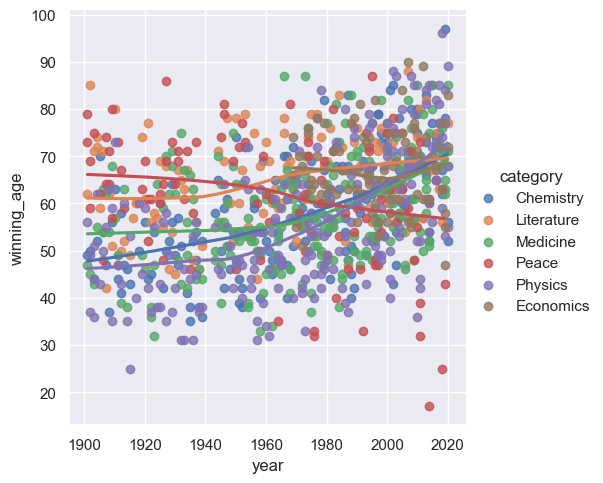

In [81]:
sns.lmplot(data=df_data, x='year', y='winning_age', lowess=True, 
           hue='category',)

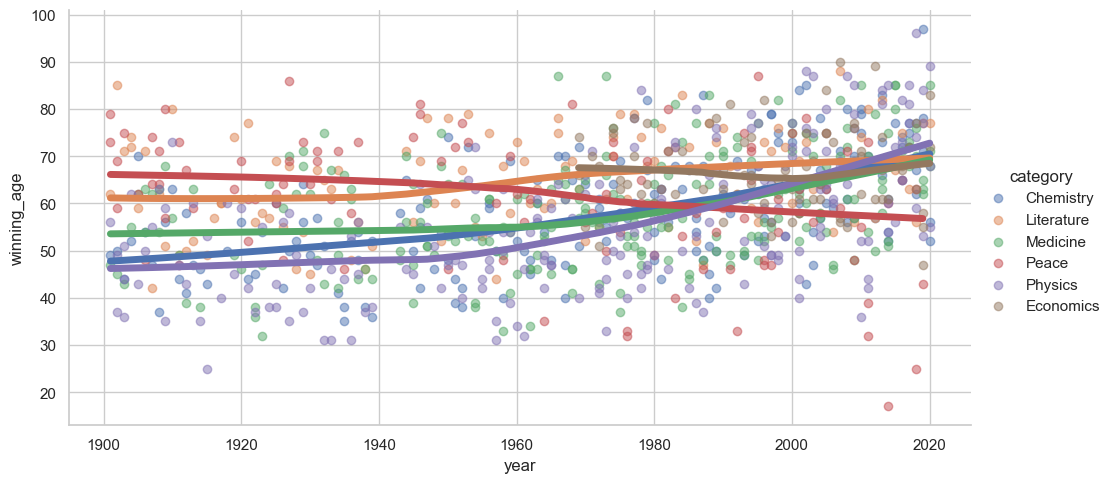

In [91]:
# Class solution - looks better
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()